In [16]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import plot_model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


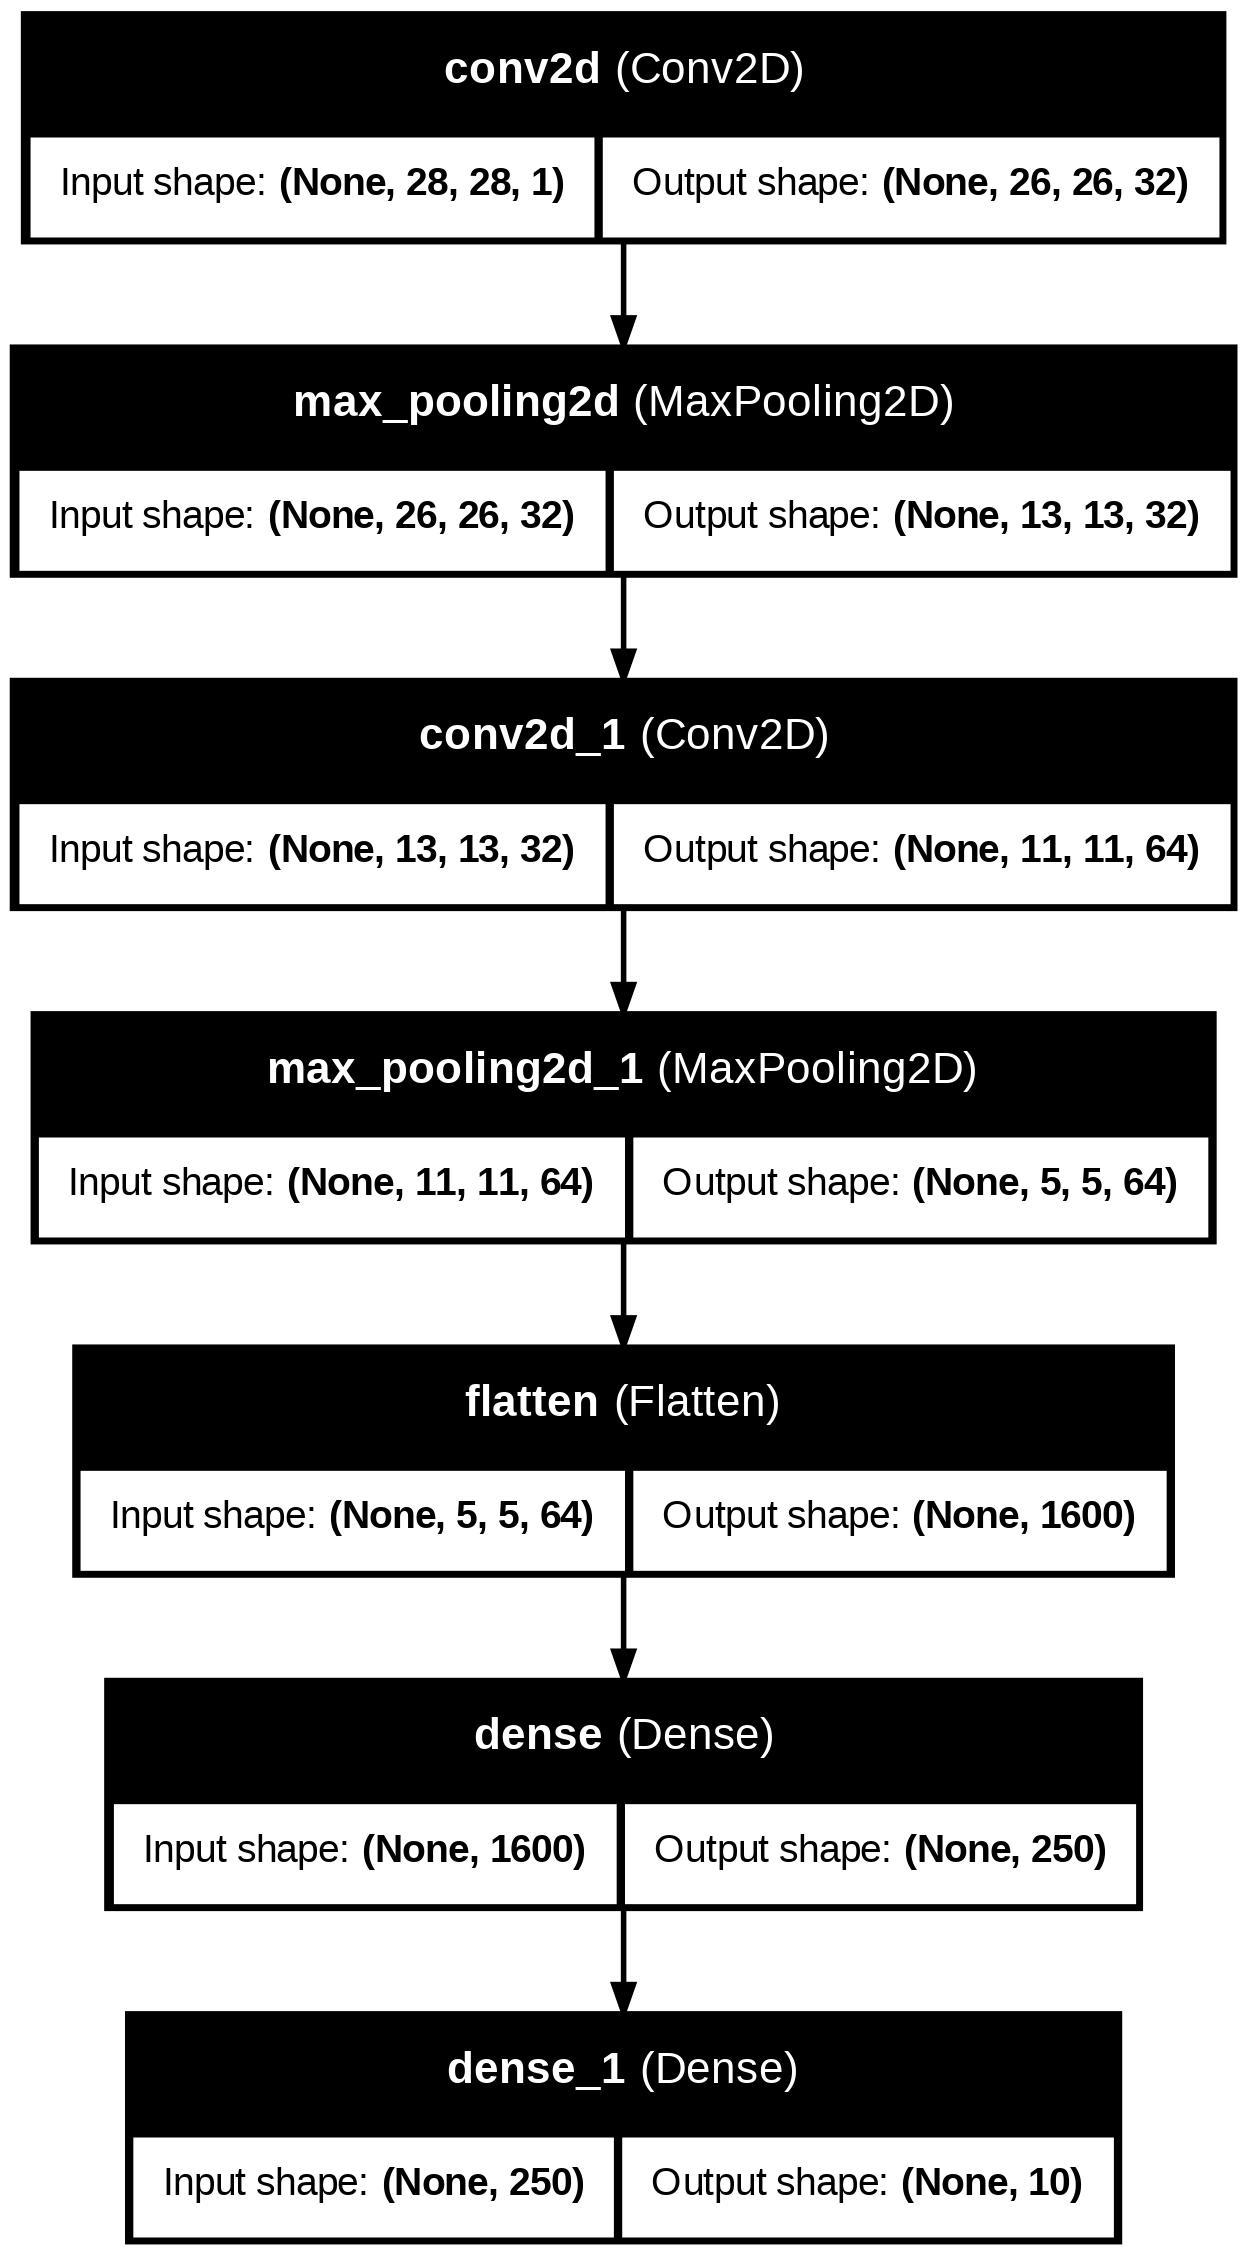

In [6]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
model.compile(optimizer=('adam'),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=128)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8717 - loss: 0.4386
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9832 - loss: 0.0541
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9888 - loss: 0.0354
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0252
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9948 - loss: 0.0172
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9956 - loss: 0.0147
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9970 - loss: 0.0098
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9971 - loss: 0.0083
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9975 - loss: 0.0075
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9974 - loss: 0.0073
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9976 - loss: 0.0075
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [8]:
loss,accuracy = model.evaluate(x_test, y_test, verbose=0)
print('loss=', loss)
print('accuracy=', accuracy)

loss= 0.04044974967837334
accuracy= 0.9912999868392944


In [9]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


In [13]:
from PIL import ImageGrab, Image
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


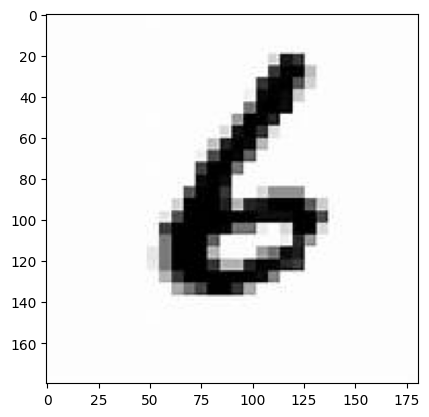

In [17]:
plt.imshow(Image.open('/content/drive/MyDrive/th.jpeg'))

In [18]:
predict_digit(Image.open('/content/drive/MyDrive/th.jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(3, 0.8439582)

In [19]:
predict_digit(Image.open('/content/drive/MyDrive/th (1).jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(3, 1.0)

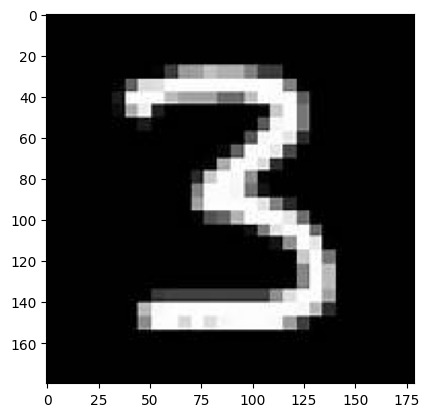

In [20]:
plt.imshow(Image.open('/content/drive/MyDrive/th (1).jpeg'))

In [21]:
predict_digit(Image.open('/content/drive/MyDrive/th (2).jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(5, 0.9084922)

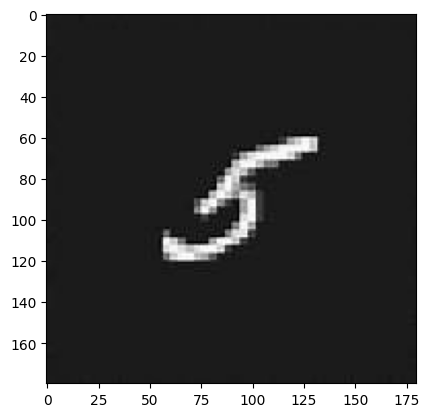

In [22]:
plt.imshow(Image.open('/content/drive/MyDrive/th (2).jpeg'))

In [23]:
predict_digit(Image.open('/content/drive/MyDrive/th (3).jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(2, 0.5237986)

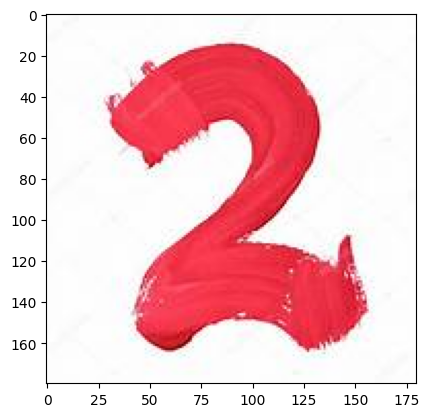

In [24]:
plt.imshow(Image.open('/content/drive/MyDrive/th (3).jpeg'))